In [1]:
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
from scipy import spatial
import pickle
import matplotlib.pyplot as plt

In [2]:
ratings = []
with open('dataset/user-shows-with-u20-has-1st-100-ratings-set-0.txt', 'r') as f:
    for line in f:
        line = list(map(int, line.strip().split()))
        ratings.append(line)
        
R = np.matrix(ratings)
m, n = R.shape
m, _ = R.shape
P = np.zeros([m, m])

for i in range(m):
    P[i, i] = np.sum(R[i])
_, n = R.shape

Q = np.zeros([n, n])
for i in range(n):
    Q[i, i] = np.sum(R[:, i])

Ps = P
for i in range(m):
    Ps[i, i] = np.sqrt(1.0 / P[i, i])

Qs = Q
for i in range(n):
    Qs[i, i] = np.sqrt(1.0 / Q[i, i])

#Gu2uSim = Q^(-1/2) R^T RQ^(-1/2)
Gu2uSim = Ps * R * R.T * Ps * R
u2u = np.array(Gu2uSim[19, :100]).flatten().argsort()[::-1]

#Gi2iSim = P^(-1/2) RR^T P^(-1/2)
Gi2iSim = R * Qs * R.T * R * Qs
i2i = np.array(Gi2iSim[19, :100]).flatten().argsort()[::-1]


In [3]:
i2iSimScoresInDescOrder = np.array(Gi2iSim[19, :100]).flatten()[i2i]

In [4]:
u2uSimScoresInDescOrder = np.array(Gu2uSim[19, :100]).flatten()[u2u]

In [5]:
u2u

array([96, 74, 45, 35, 60,  9,  5, 68, 82, 72, 62, 97, 64, 59, 46, 65, 36,
       44, 11, 40, 99, 90, 25, 76,  2,  1, 13, 20, 63, 43, 10, 15, 48, 41,
       38, 88, 14, 67, 81, 73, 98,  8, 54, 34, 19, 87, 55, 56, 17, 86, 58,
       71, 69, 91, 66, 29, 70, 16, 57, 77, 31, 53, 22, 85, 89, 21, 93, 83,
        4, 28, 52, 78,  6, 27, 51, 32, 12, 23, 84,  3, 79,  0, 37, 50, 26,
       95, 42, 94, 92, 49, 24, 33, 30, 39, 75,  7, 18, 61, 80, 47], dtype=int64)

In [6]:
i2i

array([35, 63, 96, 74, 48, 44, 45,  5, 40, 60,  9, 82, 68, 36, 66, 97, 69,
       38, 59, 62, 72, 70, 41, 64, 65, 99, 46, 25, 90,  2, 11, 20,  1, 76,
       43, 10, 13, 77, 88, 14, 73, 98, 15, 81, 87, 67, 17, 86, 55, 56,  8,
       34, 54, 19, 58, 53, 71, 91, 78, 31, 85, 22, 16, 57, 29, 79, 37, 52,
       89, 51, 83, 21, 93,  4, 28,  6, 27, 84, 12, 23, 32,  3, 42,  0, 50,
       39, 95, 92, 49, 94, 30, 24, 75, 26, 33,  7, 18, 61, 80, 47], dtype=int64)

In [7]:
import pandas as pd
shows = pd.read_csv('dataset/shows.txt', sep=" ", header = None,names=["showname"])

In [8]:
shows.loc[3,'showname']

'The Colbert Report'

In [9]:
def getTopNRecommendatonsBasedOnU2U(N):
    topNRecsU2U=[]
    cnt=0
    for i in u2u[:N]:
        cnt+=1
        topNRecsU2U.append(i)
    return topNRecsU2U

In [10]:
def printTopNRecommendatonsBasedOnU2U(N):
    print ('Top '+ str(N) + ' shows based on user-user collaborative filtering:')
    cnt=0
    print('sl.no \t show id \tSimilarity Score \tshowname')
    for i in u2u[:N]:
        cnt+=1
        print(str(cnt)+'\t   '+str(i) +'\t\t'+str(u2uSimScoresInDescOrder[cnt-1])+'\t\t'+ str(shows.ix[i,'showname']))

In [11]:
printTopNRecommendatonsBasedOnU2U(5)

Top 5 shows based on user-user collaborative filtering:
sl.no 	 show id 	Similarity Score 	showname
1	   96		666.482823518		FOX 28 News at 10pm
2	   74		664.956977312		Family Guy
3	   45		588.914140028		2009 NCAA Basketball Tournament
4	   35		583.334679391		SpongeBob SquarePants
5	   60		565.554362912		NBC 4 at Eleven


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [12]:
def getTopNRecommendatonsBasedOnI2I(N):
    cnt=0
    topNRecsI2I=[]
    for i in i2i[:N]:
        cnt+=1
        topNRecsI2I.append(i)
    return topNRecsI2I

In [13]:
def printTopNRecommendatonsBasedOnI2I(N):
    print ('Top '+ str(N) + ' shows based on Item-Item collaborative filtering:')
    cnt=0
    print('sl.no \t show id \tSimilarity Score \tshowname')
    for i in i2i[:N]:
        cnt+=1
        print(str(cnt)+'\t   '+str(i) +'\t\t'+str(i2iSimScoresInDescOrder[cnt-1])+'\t\t'+ str(shows.ix[i,'showname']))

In [14]:
printTopNRecommendatonsBasedOnI2I(5)

Top 5 shows based on Item-Item collaborative filtering:
sl.no 	 show id 	Similarity Score 	showname
1	   35		15.3857091975		SpongeBob SquarePants
2	   63		15.2473454314		Wow Wow Wubbzy
3	   96		14.9542951772		FOX 28 News at 10pm
4	   74		14.9275885465		Family Guy
5	   48		14.9246217896		Max and Ruby


In [16]:
with open('dataset/user20.txt', 'r') as f:
        user20 = np.array(list(map(int, f.readline().strip().split())))

In [17]:
def getShowsActuallyWatchedByUser20():
    showsActuallyWatched = []
    indx=0
    for i in user20[0:99]:
        indx += 1
        if i == 1:
            showsActuallyWatched.append(indx-1)
    return showsActuallyWatched

In [24]:
def printShowsActuallyWatchedByUser20():
    indx=0
    print("Actually watched shows by user 20")
    print('Id \tShow Name')
    for i in user20[0:99]:
        indx += 1
        if i == 1:
            print(str(indx-1) +' \t'+ shows.loc[indx-1,'showname'])

In [25]:
#actually watched shows
getShowsActuallyWatchedByUser20()

[15, 20, 35, 39, 40, 42, 43, 54, 58, 60, 62, 63, 66, 67, 68, 69, 70, 74, 96]

In [26]:
printShowsActuallyWatchedByUser20()

Actually watched shows by user 20
Id 	Show Name
15 	60 Minutes
20 	CBS Evening News
35 	SpongeBob SquarePants
39 	Sweat Equity
40 	The Fairly OddParents
42 	Dog the Bounty Hunter
43 	Law & Order: Criminal Intent
54 	MLB Baseball
58 	ESPNews 
60 	NBC 4 at Eleven
62 	NBC 4 Today 
63 	Wow Wow Wubbzy
66 	LazyTown
67 	Today Weekend
68 	Today
69 	Blue's Clues
70 	Franklin
74 	Family Guy
96 	FOX 28 News at 10pm


In [27]:
def getTruPosForU2U():
    actualShows=getShowsActuallyWatchedByUser20()
    truPos=[]
    for k in range(20):
        topKRecUser=getTopNRecommendatonsBasedOnU2U(k)
        cntTopK=0
        for krec in topKRecUser:
            if krec in actualShows:
                cntTopK += 1
        TPR=cntTopK/float(len(actualShows))
        truPos.append(TPR)
    return truPos

In [28]:
def getTruPosForI2I():
    actualShows=getShowsActuallyWatchedByUser20()
    truPos=[]
    for k in range(20):
        topKRecItem=getTopNRecommendatonsBasedOnI2I(k)
        cntTopK=0
        for krec in topKRecItem:
            if krec in actualShows:
                cntTopK += 1
        TPR=cntTopK/float(len(actualShows))
        truPos.append(TPR)
    return truPos

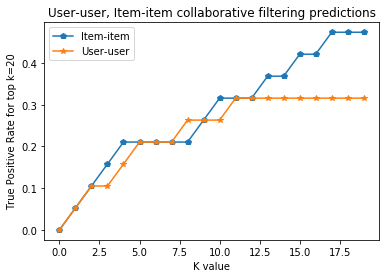

In [29]:
truPosI2I=getTruPosForI2I()
truPosU2U=getTruPosForU2U()
plt.plot(np.arange(0,20,1), np.array(truPosI2I), 'p-',np.arange(0,20,1), np.array(truPosU2U), '*-')
plt.xlabel('K value')
plt.ylabel('True Positive Rate for top k=20')
plt.title('User-user, Item-item collaborative filtering predictions')
plt.legend(('Item-item','User-user'),loc='upper left')
plt.show()

In [30]:
def plotPrecision(u2u, i2i, user20):
    u2uplot = []
    for i in range(19):
        cnt = 0
        for s in u2u[:(i+1)]:
            if user20[s] == 1:
                cnt += 1
        u2uplot.append(float(cnt) / (i + 1))
    
    print (u2uplot)
    
    i2iplot = []
    for i in range(19):
        cnt = 0
        for s in i2i[:(i+1)]:
            if user20[s] == 1:
                cnt += 1
        i2iplot.append(float(cnt) / (i + 1))
    
    print (i2iplot)

    import matplotlib.pyplot as plt
    plt.plot(range(1, 20), u2uplot, 'p-', range(1, 20), i2iplot, '*-')
    plt.xlabel('k (for k∈[1,19])')
    plt.ylabel('precison')
    plt.grid(True)
    plt.legend(('User-user', 'Item-item'))

[1.0, 1.0, 0.6666666666666666, 0.75, 0.8, 0.6666666666666666, 0.5714285714285714, 0.625, 0.5555555555555556, 0.5, 0.5454545454545454, 0.5, 0.46153846153846156, 0.42857142857142855, 0.4, 0.375, 0.35294117647058826, 0.3333333333333333, 0.3157894736842105]
[1.0, 1.0, 1.0, 1.0, 0.8, 0.6666666666666666, 0.5714285714285714, 0.5, 0.5555555555555556, 0.6, 0.5454545454545454, 0.5, 0.5384615384615384, 0.5, 0.5333333333333333, 0.5, 0.5294117647058824, 0.5, 0.47368421052631576]


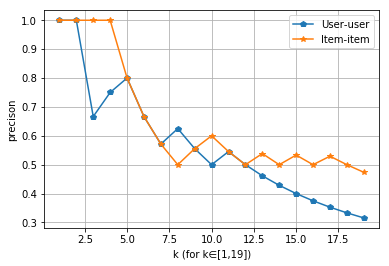

In [31]:
plotPrecision(u2u, i2i, user20)